# Task 2 Prediction using Unsupervised ML

__Author : Viraj patel__

__Using K-Means Clustering__

__dataset - Iris__

In [1]:
#import library 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

### Get Data From CSV File

In [2]:
iris=pd.read_csv('Iris.csv')
print(iris.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


## determine optimum number of the cluster 

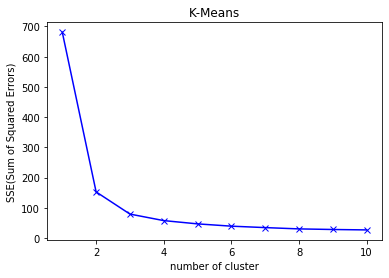

In [3]:
#Here simply ignore id and Species which don't have any need to predict the data
x=iris.iloc[:,[1,2,3,4]].values

#find the number of the cluster
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=500,n_init=5,random_state=0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,11),WCSS,'bx-')
plt.title('K-Means')
plt.xlabel('number of cluster')
plt.ylabel('SSE(Sum of Squared Errors)')
plt.show()

Above graph clearly shows the 'elbow point'.At point 3 , inertia starts to decrease in linear manner which know as elbow point.

So here, Elbow point = 3 which means number of cluster is 3.

In [4]:
kmeans=KMeans(n_clusters=3,max_iter=500,init='k-means++',n_init=5,random_state=0)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## Plot Scatter Graph of cluster

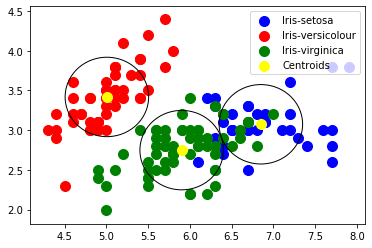

In [5]:
figure, axes = plt.subplots() 
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s=100,c='blue',label='Iris-setosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s=100,c='red',label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s=100,c='green',label='Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

#draw circle around centroid

Dc = plt.Circle((kmeans.cluster_centers_[0, 0],kmeans.cluster_centers_[0, 1]),0.5,fill=False)
axes.add_artist( Dc )
Dc = plt.Circle((kmeans.cluster_centers_[1, 0],kmeans.cluster_centers_[1, 1]),0.5,fill=False)
axes.add_artist( Dc )
Dc = plt.Circle((kmeans.cluster_centers_[2, 0],kmeans.cluster_centers_[2, 1]),0.5,fill=False)
axes.add_artist( Dc )
plt.legend(loc='upper right')
plt.show()